In [ ]:
from pathlib import Path

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from src import set_main_data_folder, eca

In [2]:
set_main_data_folder(Path('/ssd2/mldata/GenHack2025/data'))

/ssd2/mldata/GenHack2025/data


# ECA Blend dataset

## Load stations meta data (position, STAID, etc.)

## Load individual station data (temperatures etc.)

We need to restrict dates to avoid creating an overly large table

In [ ]:
dfs = []

year = 2020
quarter = 1

stations_data_df = eca.from_timeperiod(2020, 1)
stations_data_df = eca.from_timeperiod(2020, 2)
stations_data_df = eca.from_timeperiod(2020, 3)
stations_data_df = eca.from_timeperiod(2020, 4)
stations_data_df = eca.from_timeperiod(2021, 1)
stations_data_df = eca.from_timeperiod(2021, 2)
stations_data_df = eca.from_timeperiod(2021, 3)
stations_data_df = eca.from_timeperiod(2021, 4)
stations_data_df = eca.from_timeperiod(2022, 1)
stations_data_df = eca.from_timeperiod(2022, 2)
stations_data_df = eca.from_timeperiod(2022, 3)
stations_data_df = eca.from_timeperiod(2022, 4)
stations_data_df = eca.from_timeperiod(2023, 1)
stations_data_df = eca.from_timeperiod(2023, 2)
stations_data_df = eca.from_timeperiod(2023, 3)
stations_data_df = eca.from_timeperiod(2023, 4)
stations_data_df = eca.from_timeperiod(year, quarter)

Found data for year=2020, quarter=1, loading Dataframe ...
No data for year=2020, quarter=2, building Dataframe ...
Done building Dataframe, found 473390 rows of data.
No data for year=2020, quarter=3, building Dataframe ...
Done building Dataframe, found 487620 rows of data.
No data for year=2020, quarter=4, building Dataframe ...
Done building Dataframe, found 484561 rows of data.
No data for year=2021, quarter=1, building Dataframe ...
Done building Dataframe, found 474789 rows of data.
No data for year=2021, quarter=2, building Dataframe ...
Done building Dataframe, found 480807 rows of data.
No data for year=2021, quarter=3, building Dataframe ...
Done building Dataframe, found 486281 rows of data.
No data for year=2021, quarter=4, building Dataframe ...
Done building Dataframe, found 489011 rows of data.
No data for year=2022, quarter=1, building Dataframe ...
Done building Dataframe, found 467612 rows of data.
No data for year=2022, quarter=2, building Dataframe ...
Done buildin

## Convert df to gdf

In [4]:
stations_data_gdf = gpd.GeoDataFrame(
    stations_data_df, 
    geometry=gpd.points_from_xy(stations_data_df['LON_decimal'], stations_data_df['LAT_decimal']),
    crs="EPSG:4326" # (WGS84, adequate for lat/lon coordinates)
)

## Visualize for a specific date

In [5]:
stations_data_gdf.head()

,Unnamed: 0,STAID,SOUID,DATE,TX,Q_TX,TX_kelvin,LON_decimal,LAT_decimal,geometry
0,0,2,36438,2020-01-01,54,0,278.55,15.616667,60.616667,POINT (15.61667 60.61667)
1,1,2,36438,2020-01-02,63,0,279.45,15.616667,60.616667,POINT (15.61667 60.61667)
2,2,2,36438,2020-01-03,68,0,279.95,15.616667,60.616667,POINT (15.61667 60.61667)
3,3,2,36438,2020-01-04,27,0,275.85,15.616667,60.616667,POINT (15.61667 60.61667)
4,4,2,36438,2020-01-05,9,0,274.05,15.616667,60.616667,POINT (15.61667 60.61667)


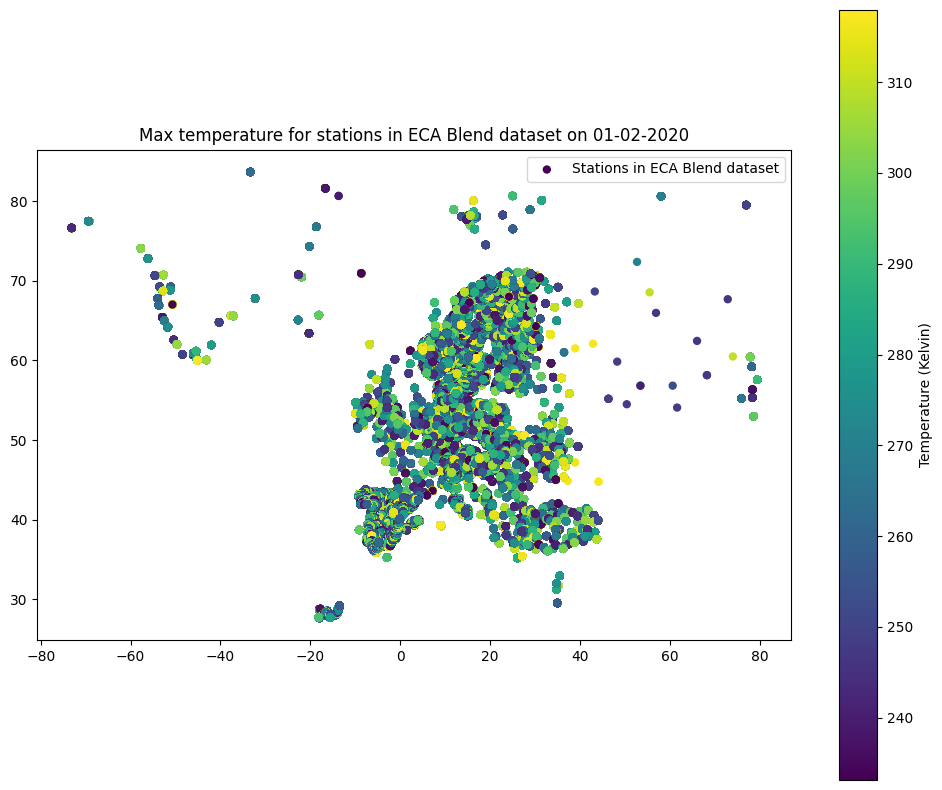

In [6]:
wanted_date = pd.to_datetime('20200201', format='%Y%m%d')
stations_data_on_date_gdf = stations_data_gdf[stations_data_gdf['DATE'] == wanted_date]
stations_data_on_date_gdf = stations_data_gdf[~ pd.isna(stations_data_gdf['TX_kelvin'])]

fig, ax = plt.subplots(figsize=(10, 8))

# Create the colormap based on the 'TX_kelvin' values (temperature)
cmap = plt.cm.viridis

# Normalize the temperature data for color mapping (scaling to 0-1 range)
norm = mcolors.Normalize(vmin=stations_data_on_date_gdf['TX_kelvin'].min(),
                         vmax=stations_data_on_date_gdf['TX_kelvin'].max())

# Plot the stations using the temperature values to map the colors
scatter = stations_data_on_date_gdf.plot(ax=ax, 
                                               c=stations_data_on_date_gdf['TX_kelvin'], 
                                               cmap=cmap,
                                               markersize=100, 
                                               marker=".", 
                                               label='Stations in ECA Blend dataset')

# Create a ScalarMappable object for the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # This is needed to prevent warnings and allow colorbar creation

# Add a colorbar with a label explaining the temperature
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Temperature (Kelvin)')

# Add legend for the city boundary and stations
ax.legend()
plt.legend()
plt.title(f"Max temperature for stations in ECA Blend dataset on {wanted_date.strftime('%d-%m-%Y')}")
plt.tight_layout()
plt.show()